# Springboard Data Science Career Track
# Exploratory Data Analysis London Boroughs Housing Prices Increase 

## Objectives


***Find out which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

Of the tools, techniques and concepts, this Project required the application of the following: 
- **pandas**
    - **data ingestion and inspection** 
    - **exploratory data analysis** 
    - **tidying and cleaning** 
    - **transforming DataFrames** 
    - **subsetting DataFrames with lists** 
    - **filtering DataFrames** 
    - **grouping data** 
    - **melting data** 
    - **advanced indexing** 
- **matplotlib** 

### 1. Sourcing and Loading 

#### 1.1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

properties_df = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing

**2.1. Exploring the data**

In [3]:
properties_df.shape

(320, 49)

In [4]:
properties_df.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


**2.2. Cleaning and transforming the data**

Cleaning the data by transposing it, changing index, dropping unnecessary rows, and melting (unpivoting) it.

In [5]:
properties = properties_df.copy()
properties.index = properties.iloc[:,0]
properties = properties.T
properties.reset_index(inplace = True)
properties = properties.drop(0, axis = 0)
properties = pd.melt(properties, id_vars = ['index', pd.NaT])
properties = properties.rename(columns = {'index':'Borough', pd.NaT:'ID', 'Unnamed: 0':'Date', 'value':'Average_Price'})
properties.head()

,Borough,ID,Date,Average_Price
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [6]:
properties.dropna(inplace = True)
properties.head()

,Borough,ID,Date,Average_Price
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


Making sure column data types are all correct, converting average prices to be floating point number.

In [7]:
properties.Average_Price = pd.to_numeric(properties.Average_Price)
properties.dtypes

Borough                  object
ID                       object
Date             datetime64[ns]
Average_Price           float64
dtype: object

There are only 32 London Boroughs, however there are more unique entries in that column.
</br>Here all non Borough entries are found and eliminated.

In [8]:
print(len(properties['Borough'].unique()))
properties['Borough'].unique()

45


array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [9]:
del_list = ['Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England']
properties = properties[~properties.Borough.isin(del_list)]

**2.3. Visualizing the data**

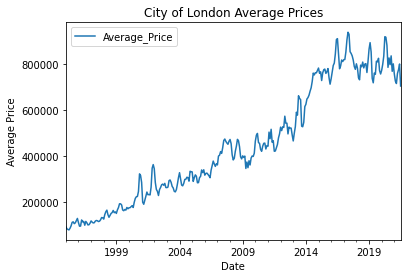

In [10]:
properties[properties.Borough == 'City of London'].plot(x = 'Date', y = 'Average_Price')
plt.ylabel('Average Price')
plt.title('City of London Average Prices')
plt.show()

To limit the number of data points, extracted the year from every month value. And got the averages for each year and each borough.

In [11]:
properties['Year'] = properties['Date'].apply(lambda d: d.year)
dfg = properties.groupby(['Borough', 'Year']).mean().reset_index()
dfg.head()

,Borough,Year,Average_Price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


### 3. Modeling

Created a function that calculates a ratio of house prices, comparing the price of a house in 2020 to the price in 2000.

In [12]:
def get_data(boro):
    return float(dfg[(dfg['Borough']==boro) & (dfg['Year']== 2020)].Average_Price) / float(dfg[(dfg['Borough']==boro) & (dfg['Year']== 2000)].Average_Price)
get_data('Sutton')
df_mod = pd.DataFrame()
df_mod['Borough'] = dfg['Borough'].unique()
df_mod['Price_Change'] = df_mod['Borough'].apply(get_data)
df_mod.head()

,Borough,Price_Change
0,Barking & Dagenham,3.896131
1,Barnet,3.130527
2,Bexley,3.324508
3,Brent,3.446671
4,Bromley,2.941012


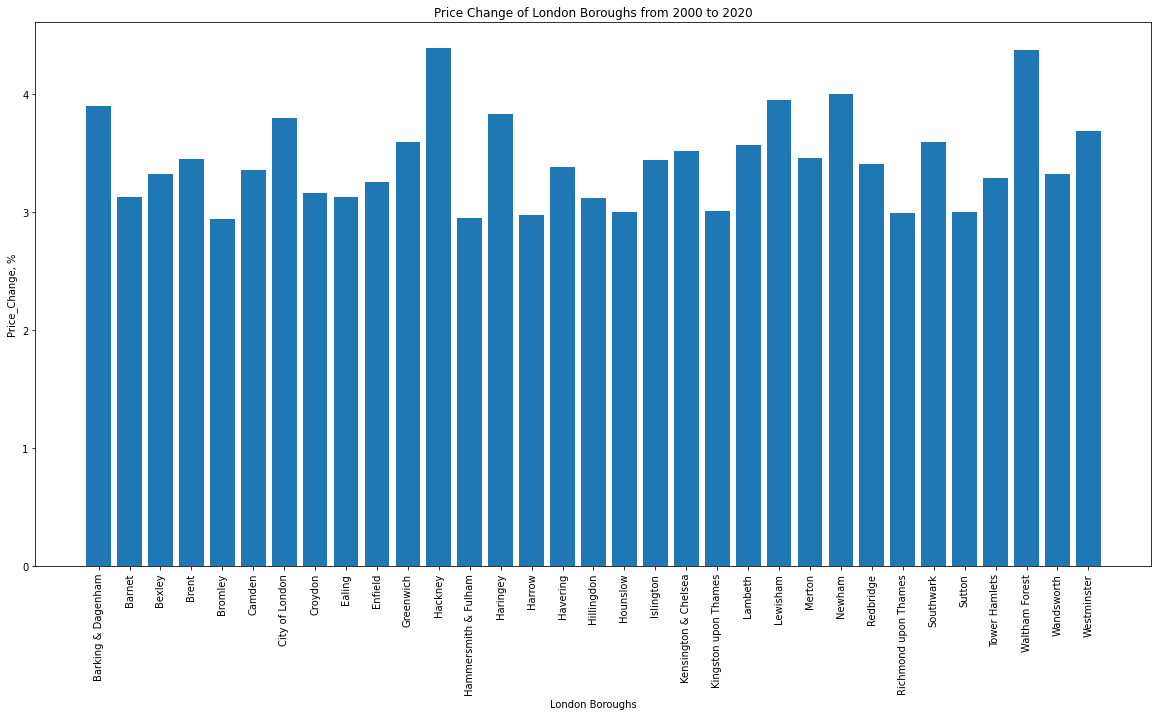

In [13]:
fig, axes = plt.subplots(figsize = [20,10])
plt.bar(df_mod['Borough'], df_mod['Price_Change'])
plt.xticks(rotation = 'vertical')
plt.ylabel('Price_Change, %')
plt.xlabel('London Boroughs')
plt.title('Price Change of London Boroughs from 2000 to 2020')
plt.show()

### 4. Conclusion

Based on average price change over last two decades, following boroughs of London have seen the greatest increase in housing prices:

- Hackney
- Waltham Forest
- Newham
- Lewisham
- Barking & Dagenham
- Haringey
- City of London
- Westminster
- Southwark
- Greenwich

In [14]:
df_mod.sort_values('Price_Change', ascending = False)[:10]

,Borough,Price_Change
11,Hackney,4.387150
30,Waltham Forest,4.367752
24,Newham,3.998745
22,Lewisham,3.949339
0,Barking & Dagenham,3.896131
13,Haringey,3.833316
6,City of London,3.792678
32,Westminster,3.687132
27,Southwark,3.590929
10,Greenwich,3.589197


In [15]:
'''
Identifying the cheapest and the most expensive boroughs...
'''
df_20 = properties[properties['Year'] == 2020]
expensive = df_20.loc[df_20['Average_Price'].idxmax(), 'Borough']
cheapest = df_20.loc[df_20['Average_Price'].idxmin(), 'Borough']
print('The most expensive borough in 2020 is {}.\nWhile the cheapest borough is {}'.format(expensive, cheapest))

The most expensive borough in 2020 is Kensington & Chelsea.
While the cheapest borough is Barking & Dagenham


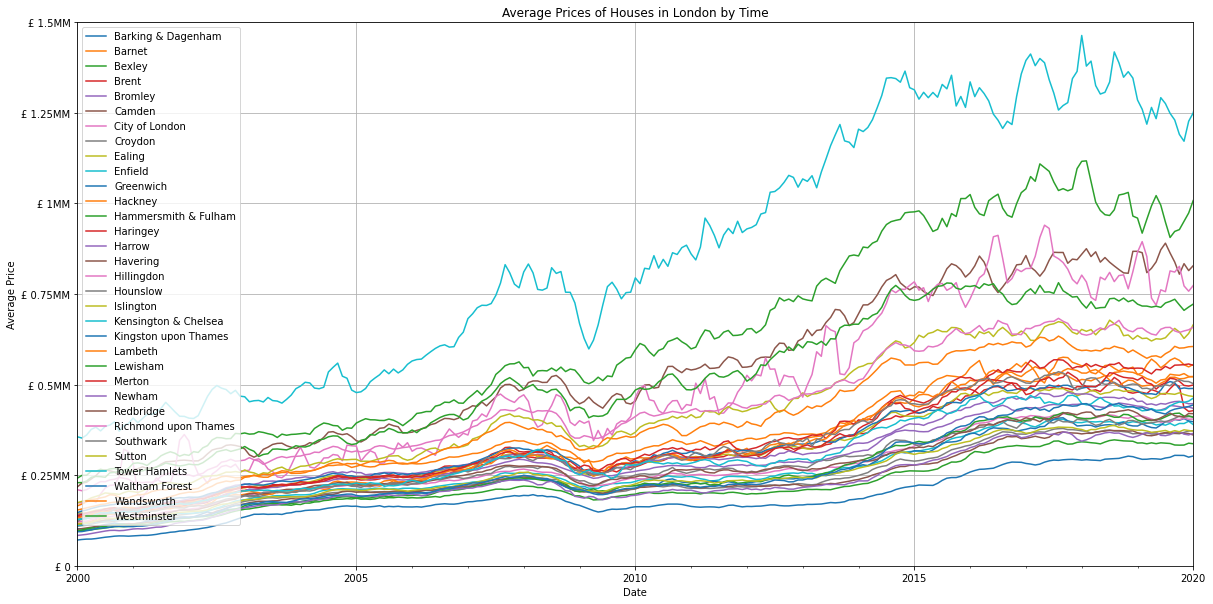

In [16]:
properties.pivot_table(index = 'Date', columns = 'Borough', values = 'Average_Price').plot(figsize= [20,10])
plt.yticks([0, 250000, 500000, 750000, 1000000, 1250000, 1500000], ['£ 0', '£ 0.25MM', '£ 0.5MM', '£ 0.75MM', '£ 1MM', '£ 1.25MM','£ 1.5MM'])
plt.xticks(['2000-01-01', '2005-01-01', '2010-01-01', '2015-01-01', '2020-01-01'],['2000', '2005', '2010', '2015', '2020'])
plt.ylabel('Average Price')
plt.title('Average Prices of Houses in London by Time')
plt.axis(('2000-01-01', '2020-01-01', 0, 1500000))
plt.grid(True)
plt.legend(loc = 2)
plt.savefig('overall.png')
plt.show()